In [ ]:
# Importación de librerías
import pprint
import requests 
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import LocalOutlierFactor

!pip install catboost
!pip install skforecast
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

     |████████████████████████████████| 76.6 MB 55 kB/s 
     |████████████████████████████████| 87 kB 3.4 MB/s 
     |████████████████████████████████| 9.8 MB 6.5 MB/s 
     |████████████████████████████████| 76 kB 3.1 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carga de los datos como DataFrame de Pandas
data = pd.read_csv('/content/drive/My Drive/Informe tècnic/cajamar/Modelar_UH2022.txt', sep="|")
# Ordenación por ID
data.sort_values(data.columns[0], ascending=True)

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
5848,0,2019-05-05 18:35:46,357698,0.0,25,0.0
5847,0,2019-05-05 14:35:47,357642,0.0,1,0.0
5846,0,2019-05-05 20:35:46,357745,0.0,16,0.0
5845,0,2019-05-05 15:35:46,357669,0.0,27,0.0
...,...,...,...,...,...,...
21404819,2749,2019-08-06 00:30:04,156799,0.0,0,0.0
21404825,2756,2019-04-06 07:50:17,349770,0.0,12,0.0
21404826,2756,2019-04-06 04:50:17,349758,0.0,0,0.0
21404824,2756,2019-04-06 05:50:17,349758,0.0,0,0.0


In [ ]:
# Visualización de las 10 primeras filas del DataFrame
data.head(10)

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10,369356,0.0,28,0.0
5,0,2019-06-13 01:34:09,369283,0.0,0,0.0
6,0,2019-06-13 16:34:10,369401,0.0,42,0.0
7,0,2019-06-13 10:34:09,369323,0.0,0,0.0
8,0,2019-06-13 22:34:08,369511,0.0,15,0.0
9,0,2019-06-13 23:34:08,369552,0.0,41,0.0


In [ ]:
# Visualización de las 10 primeras filas de una cierta ID cualquiera
id = 2686
data[data["ID"]==id].head(10)

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
21342972,2686,2020-01-17 23:00:01,168,0.0,0,0.0
21342973,2686,2020-01-17 18:59:59,167,0.0,1,0.0
21342974,2686,2020-01-17 22:00:01,168,0.0,0,0.0
21342975,2686,2020-01-18 01:00:01,169,0.0,0,0.0
21342976,2686,2020-01-18 19:00:10,174,0.0,1,0.0
21342977,2686,2020-01-18 03:00:06,169,0.0,0,0.0
21342978,2686,2020-01-18 11:00:10,170,0.0,0,0.0
21342979,2686,2020-01-18 13:00:10,173,0.0,3,0.0
21342980,2686,2020-01-18 08:00:09,169,0.0,0,0.0
21342981,2686,2020-01-18 07:00:09,169,0.0,0,0.0


El DataFrame con todas las filas del conjunto de datos es complicado de
tratar por problemas con la memoria RAM. Es por este motivo que, a continuación,
se lee un chunk del conjunto de datos inicial, el cual contiene una doceava
parte de los datos iniciales.

Así pues, en las próximas celdas de código, se efectua la modificación del DataFrame y la visualización gráfica de los datos de este usando únicamente un chunk de datos.

In [ ]:
data['DELTATHOUSANDTH'] = pd.to_numeric(data['DELTATHOUSANDTH'], errors='coerce')

# Unión de las columnas que almacenan la parte decimal y entera de Reading y
# DELTA en una sola columna.
data["Reading"] = data["READINGINTEGER"] + data["READINGTHOUSANDTH"]/100
data["DELTA"] = data["DELTAINTEGER"] + data["DELTATHOUSANDTH"]/100

# Traspaso de los datos a new_df, que contiene solo las columnas esenciales
new_df = pd.DataFrame()
new_df["ID"] = data["ID"]
new_df["SAMPLETIME"] = data["SAMPLETIME"]
new_df["READING"] = data["Reading"]
new_df["DELTA"] = data["DELTA"]

In [ ]:
# Lectura de cada chunk
for i in range(1,13):
  globals()[f"chunk{i}"] = pd.read_csv(f'/content/drive/My Drive/Informe tècnic/cajamar/Chunks/chunk{i}.csv')

In [ ]:
# Selección de un único chunk a partir del cual se trabajará
chunk = chunk1
chunk.head(10)

,Unnamed: 0,ID,SAMPLETIME,READING,DELTA,YEAR,MONTH,DAY,TIME
0,0,0,2019-06-13 08:34:09,369320.0,17.0,2019,6,13,08:34:09
1,1,0,2019-06-13 17:34:10,369403.0,2.0,2019,6,13,17:34:10
2,2,0,2019-06-13 18:34:10,369403.0,0.0,2019,6,13,18:34:10
3,3,0,2019-06-13 04:34:10,369284.0,1.0,2019,6,13,04:34:10
4,4,0,2019-06-13 14:34:10,369356.0,28.0,2019,6,13,14:34:10
5,5,0,2019-06-13 01:34:09,369283.0,0.0,2019,6,13,01:34:09
6,6,0,2019-06-13 16:34:10,369401.0,42.0,2019,6,13,16:34:10
7,7,0,2019-06-13 10:34:09,369323.0,0.0,2019,6,13,10:34:09
8,8,0,2019-06-13 22:34:08,369511.0,15.0,2019,6,13,22:34:08
9,9,0,2019-06-13 23:34:08,369552.0,41.0,2019,6,13,23:34:08


In [ ]:
# Creación de la columna DAY_ID. ID_DAY es un identificador único que permite
# seleccionar y ordenar fácilmente filas del DataFrame según su fecha

# Función que devuelve la id de un día dados los datos de la fecha
def calc_day_id(date):
  year, month, day = date
  year = int(year)
  month = int(month)
  day = int(day)
  return (year-2019)*365+(month-1)*(365/12)+day

date = chunk["SAMPLETIME"].str.split()
date = [d[0].split('-') for d in date]
day_ids = [calc_day_id(d) for d in date]

chunk["DAY_ID"] = day_ids

chunk.head(10)

,Unnamed: 0,ID,SAMPLETIME,READING,DELTA,YEAR,MONTH,DAY,TIME,DAY_ID
0,0,0,2019-06-13 08:34:09,369320.0,17.0,2019,6,13,08:34:09,165.083333
1,1,0,2019-06-13 17:34:10,369403.0,2.0,2019,6,13,17:34:10,165.083333
2,2,0,2019-06-13 18:34:10,369403.0,0.0,2019,6,13,18:34:10,165.083333
3,3,0,2019-06-13 04:34:10,369284.0,1.0,2019,6,13,04:34:10,165.083333
4,4,0,2019-06-13 14:34:10,369356.0,28.0,2019,6,13,14:34:10,165.083333
5,5,0,2019-06-13 01:34:09,369283.0,0.0,2019,6,13,01:34:09,165.083333
6,6,0,2019-06-13 16:34:10,369401.0,42.0,2019,6,13,16:34:10,165.083333
7,7,0,2019-06-13 10:34:09,369323.0,0.0,2019,6,13,10:34:09,165.083333
8,8,0,2019-06-13 22:34:08,369511.0,15.0,2019,6,13,22:34:08,165.083333
9,9,0,2019-06-13 23:34:08,369552.0,41.0,2019,6,13,23:34:08,165.083333


## Visualización inicial de los datos

Gráfica del consumo de agua a lo largo del tiempo por cada contador:

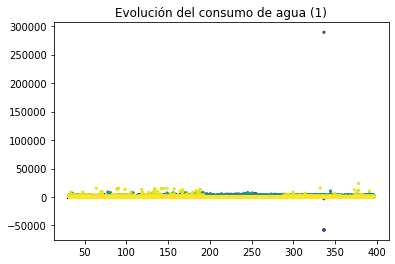

In [ ]:
plt.figure()
plt.scatter(chunk["DAY_ID"], chunk["DELTA"], c=chunk["ID"], s=5)
plt.title("Evolución del consumo de agua (1)")
plt.show()

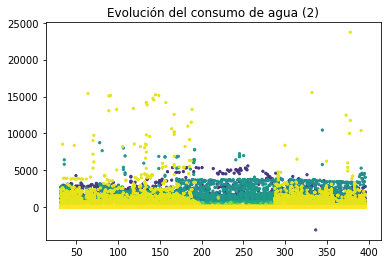

In [ ]:
# Misma gráfica pero eliminando máximo y mínimo (valores atípicos que no
# representan al resto de datos):

chunk_without_maxmin = copy.copy(chunk)
chunk_without_maxmin.drop(chunk_without_maxmin.index[chunk_without_maxmin['DELTA'] == max(chunk_without_maxmin["DELTA"])], inplace=True)
chunk_without_maxmin.drop(chunk_without_maxmin.index[chunk_without_maxmin['DELTA'] == min(chunk_without_maxmin["DELTA"])], inplace=True)

plt.figure()
plt.scatter(chunk_without_maxmin["DAY_ID"], chunk_without_maxmin["DELTA"],
            c=chunk_without_maxmin["ID"], s=5)
plt.title("Evolución del consumo de agua (2)")
plt.show()

Gráfica del consumo de agua acumulado a lo largo del tiempo por cada contador:

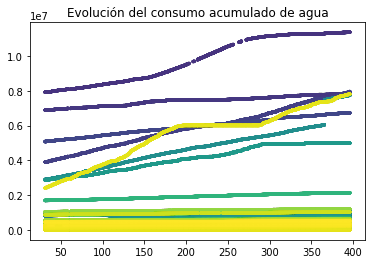

In [ ]:
plt.figure()
plt.scatter(chunk["DAY_ID"], chunk["READING"], c=chunk["ID"], s=5)
plt.title("Evolución del consumo acumulado de agua")
plt.show()

In [ ]:
def plot_scatter_by_id(df, id, column, x, title=''):
  df_id = df[df['ID']==id]
  plt.figure()
  plt.scatter(df_id[x], df_id[column], c=df_id["ID"], s=5)
  plt.title(title)
  plt.show()

def plot_by_id(df, id, column, x, title=''):
  df_id = df[df['ID']==id]
  plt.figure()
  plt.plot(df_id[x], df_id[column])
  plt.title(title)
  plt.show()

Mismas gráficas anteriores, pero esta vez únicamente para un solo contador (una ID):

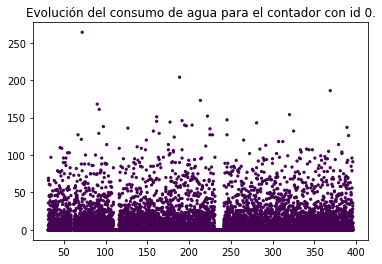

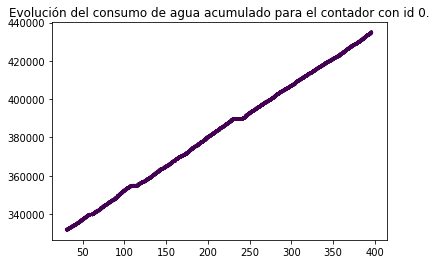

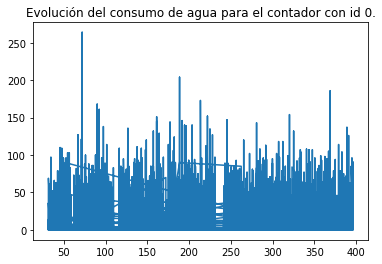

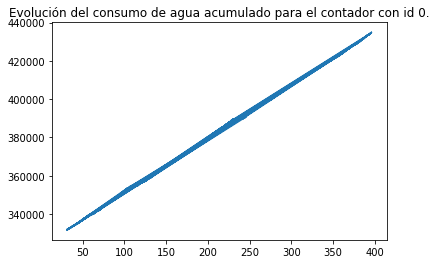

In [ ]:
id = 0

# Scatter plots
plot_scatter_by_id(chunk_without_maxmin, id, 'DELTA', 'DAY_ID',
           'Evolución del consumo de agua para el contador con id ' + str(id)
           + '.')
print()
plot_scatter_by_id(chunk, id, 'READING', 'DAY_ID',
           'Evolución del consumo de agua acumulado para el contador con id '
           + str(id) + '.')
print()

# Plots
plot_by_id(chunk_without_maxmin, id, 'DELTA', 'DAY_ID',
           'Evolución del consumo de agua para el contador con id ' + str(id)
           + '.')
print()
plot_by_id(chunk, id, 'READING', 'DAY_ID',
           'Evolución del consumo de agua acumulado para el contador con id '
           + str(id) + '.')

A continuación, se carga un DataFrame donde se ha agrupado por la columna DAY_ID, de tal manera que cada fila de df corresponde a un día. El preprocesado y los modelos se llevarán a cabo con un DataFrame de esta forma. De hecho, la columna DAY_ID ya no se emplea y, en su lugar, se usa la columna TIMESTAMP, la cual contiene la fecha de cada día como fecha de Pandas.

In [ ]:
# Carga de los datos como DataFrame de Pandas
df = pd.read_csv('/content/drive/My Drive/Informe tècnic/cajamar/DF.csv')

In [ ]:
# Añadido de TIMESTAMP
df['TIMESTAMP']=pd.to_datetime(df['TIMESTAMP'])

Mismas gráficas anteriores, pero con el nuevo DataFrame:

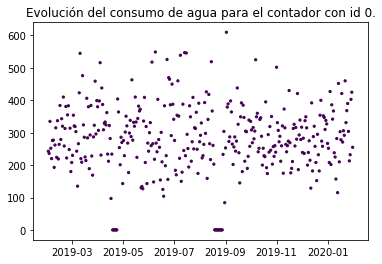

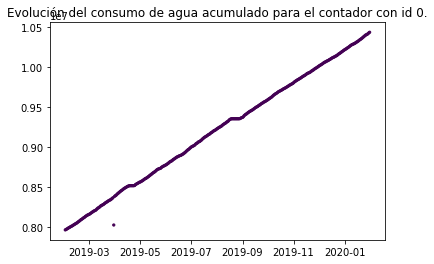

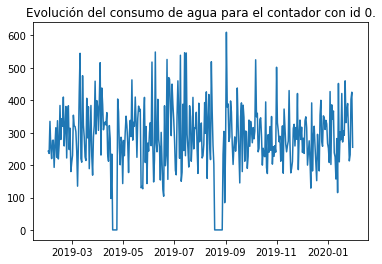

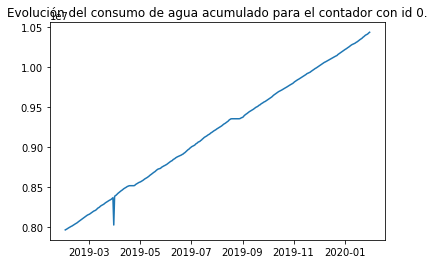

In [ ]:
id = 0

# Scatter plots
plot_scatter_by_id(df, id, 'DELTA', 'TIMESTAMP',
           'Evolución del consumo de agua para el contador con id ' + str(id)
           + '.')
print()
plot_scatter_by_id(df, id, 'READING', 'TIMESTAMP',
           'Evolución del consumo de agua acumulado para el contador con id '
           + str(id) + '.')
print()

# Plots
plot_by_id(df, id, 'DELTA', 'TIMESTAMP',
           'Evolución del consumo de agua para el contador con id ' + str(id)
           + '.')
print()
plot_by_id(df, id, 'READING', 'TIMESTAMP',
           'Evolución del consumo de agua acumulado para el contador con id '
           + str(id) + '.')

## Preprocesado

#### Arreglo de valores nulos, valores incorrectos, valores no existentes y suavizado de valores atípicos.

In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890831 entries, 0 to 890830
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TIMESTAMP  890831 non-null  datetime64[ns]
 1   ID         890831 non-null  int64         
 2   READING    890831 non-null  float64       
 3   DELTA      890831 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 27.2 MB


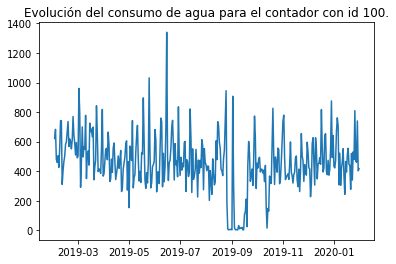

In [ ]:
id = 100
plot_by_id(df, id, 'DELTA', 'TIMESTAMP',
           'Evolución del consumo de agua para el contador con id ' + str(id)
           + '.')

In [ ]:
# Función para sustituír los valores faltantes por 0
def fill_na_0(df):
  return df.fillna(0)

# Función para sustituír los valores faltantes mediante interpolación
def fill_na_custom(df):
  return df.interpolate(method='piecewise_polynomial', axis=0).ffill().bfill()

# Función para sustituír los valores faltantes por la media
def fill_na_mean_adj(df):
   return (df.ffill()+df.bfill())/2

# Función para filtrar valores atípicos usando técnicas de machine learning
def filter_outliers(df):
  lof = LocalOutlierFactor(contamination=0.05, n_neighbors=7)
  indx = lof.fit_predict(df) 
  mask = indx == 1
  df_test = df[mask]
  return df_test

Hay dos funciones de preprocesado general.

Las dos pretenden arreglar valores nulos, valores incorrectos, valores no existentes y suavizar valores atípicos.

Los datos de dividirán en train (datos de 2019) y test (datos de 2020).

Estas dos funciones de preprocesado general están pensadas para los datos de entrenamiento. Para hacerlo más realista, se ha llevado a cabo un preprocesado menos exigente para los datos de test y, por lo tanto, este se hace en una tercera función.

In [ ]:
# Primera función de preprocesado general

def pp_train1(train, id, periods):
  date_index = pd.date_range('2019-02-1', periods=periods, freq='D')
  train=train[train["TIMESTAMP"]<pd.Timestamp('2020-01-01')]
  train.set_index('TIMESTAMP', inplace=True)
  train = train.asfreq('D')
  train=train.reindex(date_index)
  for item,frame in train["DELTA"].iteritems():
    if(pd.isnull(frame)):
      train.loc[item]["ID"]=id
      loc = train.index.get_loc(item)
      train.loc[item]["READING"]=train.iloc[loc - 1]["READING"]
      for i in range(int(len(list(train.index))/14)):
        if((loc - i*7)>0 and (loc + i*7)<periods):
          if(not np.isnan(train.iloc[loc - i*7]["DELTA"]) and not np.isnan(train.iloc[loc + i*7]["DELTA"])):
            train.loc[item]["DELTA"]=(train.iloc[loc - i*7]["DELTA"]+train.iloc[loc + i*7]["DELTA"])/2
            break
      if(np.isnan(train.iloc[loc]["DELTA"])):
        mean=[]
        for i in range(8):
          if((loc - i*7)>0 and (loc + i*7)<periods):
            if(not np.isnan(train.iloc[loc - i*7]["DELTA"])):
                mean.append(train.iloc[loc - i*7]["DELTA"])
            elif(not np.isnan(train.iloc[loc + i*7]["DELTA"])):
                mean.append(train.iloc[loc - i*7]["DELTA"]) 
        if(len(mean)>0):
          train.loc[item]["DELTA"]=sum(mean)/len(mean)
  train = fill_na_custom(train)
  train = filter_outliers(train)
  train = train.asfreq('D')
  train = train.reindex(date_index)
  train = fill_na_mean_adj(train)
  train = fill_na_custom(train)
  return train

In [ ]:
# Segunda función de preprocesado general

def pp_train2(train, id, periods):
  date_index = pd.date_range('2019-02-1', periods=periods, freq='D')
  train=train[train["TIMESTAMP"]<pd.Timestamp('2020-01-01')]
  train.set_index('TIMESTAMP', inplace=True)
  train = train.asfreq('D')
  train=train.reindex(date_index)
  if(train['DELTA'].isna().sum()>=periods-1):
    train = fill_na_0(train)
  else:
    train = fill_na_custom(train)
    train = filter_outliers(train)
    train = train.asfreq('D')
    train=train.reindex(date_index)
    train = fill_na_mean_adj(train)
    train = fill_na_custom(train)
  return train

In [ ]:
# Función de preprocesado de los datos de test

def pp_test(test):
  date_index = pd.date_range('2020-01-1', periods=31, freq='D')
  test=test[test["TIMESTAMP"]>=pd.Timestamp('2020-01-01')]
  test.set_index('TIMESTAMP', inplace=True)
  test = test.asfreq('D')
  test = test.reindex(date_index)
  if(test['DELTA'].isna().sum()>=30):
    test = fill_na_0(test)
  else:
    test = fill_na_custom(test)
    test = fill_na_0(test)
  return test

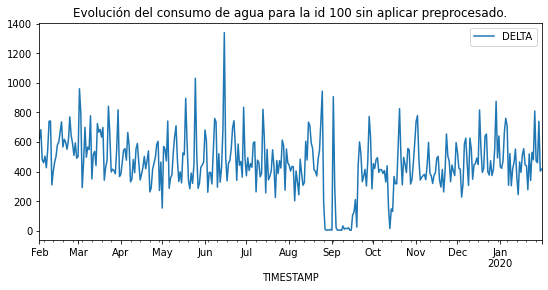

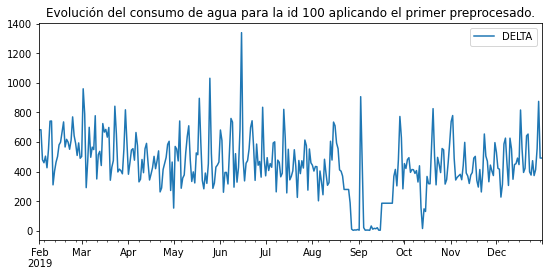

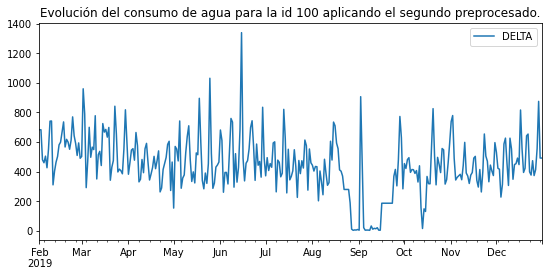

In [ ]:
original = df[df["ID"]==id]
pp1 = pp_train1(original, id, 334)
pp2 = pp_train2(original, id, 334)

#Original data
fig, ax=plt.subplots(figsize=(9, 4))
ax.set_title('Evolución del consumo de agua para la id ' + str(id) +
             ' sin aplicar preprocesado.')
date_original = original.set_index('TIMESTAMP')
date_original['DELTA'].plot(ax=ax)
ax.legend();
print()

#Preprocesed train
fig, ax=plt.subplots(figsize=(9, 4))
ax.set_title('Evolución del consumo de agua para la id ' + str(id) +
             ' aplicando el primer preprocesado.')
pp1['DELTA'].plot(ax=ax)
ax.legend();
print()

#Preprocesed train
fig, ax=plt.subplots(figsize=(9, 4))
ax.set_title('Evolución del consumo de agua para la id ' + str(id) +
             ' aplicando el segundo preprocesado.')
pp2['DELTA'].plot(ax=ax)
ax.legend();

## Modelos

In [ ]:
# Predicciones para una id usando forecasting baseline

train=df[df["ID"]==id]
date_index = pd.date_range('2019-02-1', periods=334, freq='D')
train=train[train["TIMESTAMP"]<pd.Timestamp('2020-01-01')]
train.set_index('TIMESTAMP', inplace=True)
train = train.asfreq('D')
train=train.reindex(date_index)
train = train.fillna(0)
test=df[df["ID"]==id]
date_index = pd.date_range('2020-01-1', periods=31, freq='D')
test=test[test["TIMESTAMP"]>=pd.Timestamp('2020-01-01')]
test.set_index('TIMESTAMP', inplace=True)
test = test.asfreq('D')
test = test.reindex(date_index)
test = test.fillna(0)
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(n_estimators=30,random_state = 0), lags=56)
forecaster.fit(y = train["DELTA"])
predictions=(forecaster.predict(steps=100))
valid_preds=[]
for x in (test.index):
  valid_preds.append(predictions[x])
print("ID:",id)
print("Predicted:",sum(valid_preds))
print("Real:",sum(test["DELTA"]))
print("Day MSE:",mean_squared_error(valid_preds,test["DELTA"]))

In [ ]:
#Prediccions para una id usando forecasting con suavización de outliers y llenando dias sin muestras con interpolación
train=df[df["ID"]==id]
train = pp_train2(train,id, 334)
test=df[df["ID"]==id]
test=pp_test(test)
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(n_estimators=30,random_state = 0), lags=56)
forecaster.fit(y = train["DELTA"])
predictions=(forecaster.predict(steps=100))
valid_preds=[]
for x in (test.index):
  valid_preds.append(predictions[x])
print("ID:",id)
print("Predicted:",sum(valid_preds))
print("Real:",sum(test["DELTA"]))
print("Day MSE:",mean_squared_error(valid_preds,test["DELTA"]))

ID: 100
Predicted: 14122.291833333333
Real: 14898.700000000006
Day MSE: 15311.941916805548


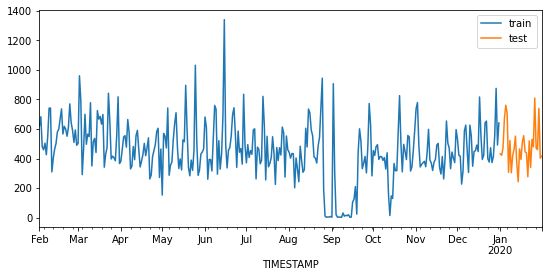

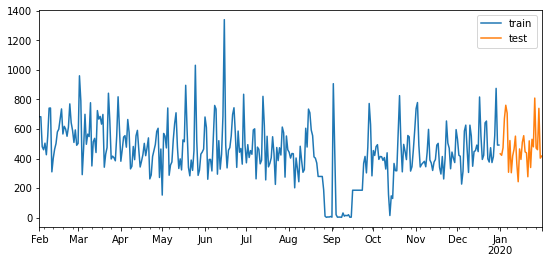

In [ ]:
# Gráficas de los datos de train y test para los datos sin preprocesado y con el
# segundo preprocesado

one_id=df[df["ID"]==id]
one_id.set_index('TIMESTAMP', inplace=True)
one_id = one_id.asfreq('D')
steps = 31
data_train = one_id[:-steps]
data_test  = one_id[-steps:]
#Original data
fig, ax=plt.subplots(figsize=(9, 4))
data_train['DELTA'].plot(ax=ax, label='train')
data_test['DELTA'].plot(ax=ax, label='test')
ax.legend();
#Preprocesed train
fig, ax=plt.subplots(figsize=(9, 4))
train['DELTA'].plot(ax=ax, label='train')
test['DELTA'].plot(ax=ax, label='test')
ax.legend();

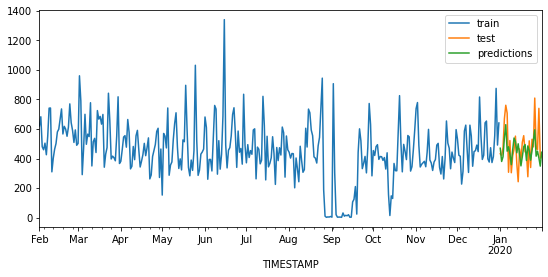

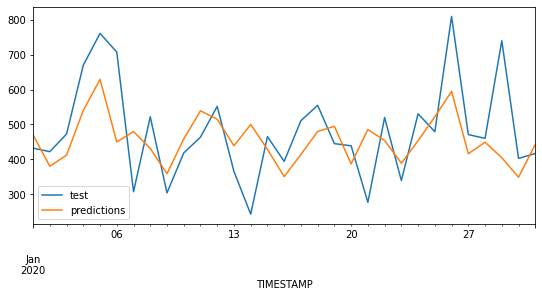

In [ ]:
# Visualización de la predicción de la id anterior sobre los datos reales

fig, ax = plt.subplots(figsize=(9, 4))
data_train['DELTA'].plot(ax=ax, label='train')
data_test['DELTA'].plot(ax=ax, label='test')
predictions = forecaster.predict(steps=31)
predictions.plot(ax=ax, label='predictions')
ax.legend();

fig, ax = plt.subplots(figsize=(9, 4))
data_test['DELTA'].plot(ax=ax, label='test')
predictions = forecaster.predict(steps=31)
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
def pp_train_4_pred(train,id):
  date_index = pd.date_range('2019-02-1', periods=365, freq='D')
  train.set_index('TIMESTAMP', inplace=True)
  train = train.asfreq('D')
  train=train.reindex(date_index)
  if(train['DELTA'].isna().sum()>=364):
    train = fill_na_0(train)
  else:
    train = fill_na_custom(train)
    train = fill_na_0(train)
    train = filter_outliers(train)
    train = train.asfreq('D')
    train=train.reindex(date_index)
    train = fill_na_mean_adj(train)
    train = fill_na_custom(train)
  return train

def pp_train_4_pred2(train,id,periods):
  date_index = pd.date_range('2019-02-1', periods=periods, freq='D')
  train.set_index('TIMESTAMP', inplace=True)
  train = train.asfreq('D')
  train=train.reindex(date_index)
  if(train['DELTA'].isna().sum()<364):
    for item,frame in train["DELTA"].iteritems():
      if(pd.isnull(frame)):
        train.loc[item]["ID"]=id
        loc = train.index.get_loc(item)
        train.loc[item]["READING"]=train.iloc[loc - 1]["READING"]
        for i in range(int(len(list(train.index))/14)):
          if((loc - i*7)>0 and (loc + i*7)<periods):
            if(not np.isnan(train.iloc[loc - i*7]["DELTA"]) and not np.isnan(train.iloc[loc + i*7]["DELTA"])):
              train.loc[item]["DELTA"]=(train.iloc[loc - i*7]["DELTA"]+train.iloc[loc + i*7]["DELTA"])/2
              break
        if(np.isnan(train.iloc[loc]["DELTA"])):
          mean=[]
          for i in range(8):
            if((loc - i*7)>0 and (loc + i*7)<periods):
              if(not np.isnan(train.iloc[loc - i*7]["DELTA"])):
                  mean.append(train.iloc[loc - i*7]["DELTA"])
              elif(not np.isnan(train.iloc[loc + i*7]["DELTA"])):
                  mean.append(train.iloc[loc - i*7]["DELTA"]) 
          if(len(mean)>0):
            train.loc[item]["DELTA"]=sum(mean)/len(mean)
    train = fill_na_custom(train)
    train = filter_outliers(train)
    train = train.asfreq('D')
    train = train.reindex(date_index)
    train = fill_na_mean_adj(train)
    train = fill_na_custom(train)
  else:
    train = fill_na_0(train)
  return train


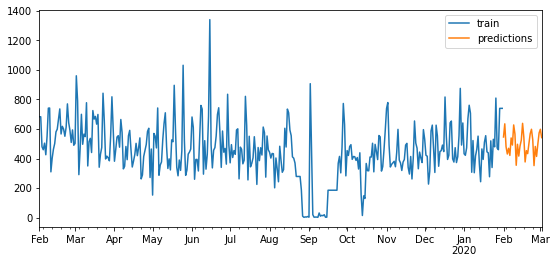

In [ ]:
# Visualización de las predicciones para el febrero de 2020

train = df[df["ID"]==id]
train = pp_train_4_pred(train,id)
forecaster.fit(y = train["DELTA"])
predictions = forecaster.predict(steps=31)
fig, ax = plt.subplots(figsize=(9, 4))
train['DELTA'].plot(ax=ax, label='train')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
#Modelo final, con búsqueda de hiperparámetros para los lags del forecaster
sumes=[]
scores=[]
MSES=[]
for id in df["ID"].unique():
  train=df[df["ID"]==id]
  date_index = pd.date_range('2019-02-1', periods=334, freq='D')
  train=train[train["TIMESTAMP"]<pd.Timestamp('2020-01-01')]
  if(len(list(train.index))>=1):
    train=df[df["ID"]==id]
    train = pp_train2(train,id, 334)
    test=df[df["ID"]==id]
    test=pp_test(test)
    forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(n_estimators=30,random_state=0),
                lags      = 12,
             )
    param_grid = {}
    lags_grid = {14,28,42,56}
    results_grid = grid_search_forecaster(
                            forecaster         = forecaster,
                            y                  = train['DELTA'],
                            param_grid         = param_grid,
                            lags_grid          = lags_grid,
                            steps              = 5,
                            refit              = True,
                            metric             = 'mean_squared_error',
                            initial_train_size = int(len(train)*0.5),
                            return_best        = True,
                            verbose            = False
                      )
    forecaster.fit(y = train["DELTA"])
    predictions=(forecaster.predict(steps=35))
    valid_preds=[]
    for x in (test.index):
      valid_preds.append(predictions[x])
    print("----------------")
    print("ID:",id)
    print("Predicted:",sum(valid_preds))
    print("Real:",sum(test["DELTA"]))
    sumes.append(sum(valid_preds))
    scores.append(sum(test["DELTA"]))
    if(len(list(test.index))>=1):
      print("Day MSE:",mean_squared_error(valid_preds,test["DELTA"]))
      MSES.append(mean_squared_error(valid_preds,test["DELTA"]))  
print("----------------")
print("Global MSE(M):",mean_squared_error(sumes,scores)/1000000)
print("Mean day MSE (M):",(sum(MSES)/len(MSES))/1000000)

Number of models compared: 4


loop lags_grid:   0%|                                               | 0/4 [00:06<?, ?it/s]


KeyboardInterrupt: ignored